In [60]:
from eulers_method import *
import matplotlib.pyplot as plt

#Euler Solution Example

Consider the problem of the cooling of an object, Newtons rule of cooling tells us that an object starting at the temperature $T_0$ such that $T(0) = T_0$. 

$$\frac{dT}{dt} = \alpha (T-T_s)$$

Where $T_s$ is the temperature of the objects surroundings, T(t) is the temperature of that object at time t and $\alpha <0$ is a constant of proportionality, since the rate of cooling is proportionate to the difference of the object temperature and the surrounding temperature.

We next integrate both sides w.r.t time.

$$
\begin{align*}
\int^{t}_{0}\frac{1}{\alpha (T-T_s)} \frac{dT}{dt} dt =\int^{t}_{0}dt \\
\int^{t}_{0}\frac{1}{(T-T_s)} dT = \alpha t \\
\ln{|T-T_s|-\ln{|T_0-T_s|}} = \alpha t \\
\ln{\frac{|T-T_s|}{|T_0-T_s|}} = \alpha t \\
\frac{|T-T_s|}{|T_0-T_s|} = e^{\alpha t} \\
|T-T_s| = |T_0-T_s|e^{\alpha t}
\end{align*}
$$

Case 1: if we assume that $T_0 > T_s$ and that $T(t) \geq T_s$ then $T = T_s + (T_s - T_s) e^{\alpha t}$

Case 2: if we assume that $T_0 < T_s$ and that $T(t) \leq T_s$ then $T = (T_s - T_0) e^{\alpha t} - T_s$

In [61]:
def law_of_cooling(T:float,alpha:float,surrounding_temperature:float) -> float:
    if alpha > 0:
        raise TypeError("Alpha must be negative.")
    return alpha * (T - surrounding_temperature)

In [62]:
initial_temperature = 30

In [63]:
x,y = euler_method(
    lambda x,y: law_of_cooling(x,-1,35),
    [0,initial_temperature],
    1,
    1000
)

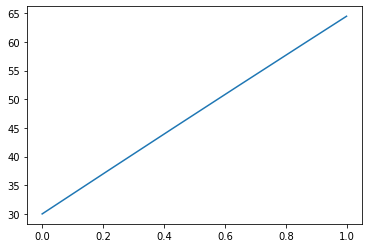

In [64]:
plt.plot(x,y)